# Regression
Elimizdeki verileri kullanarak gelecekteki verileri tahmin etme.

In [2]:
# pip install xlrd

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 100)

EDA - Exploratory Data Analysis

In [4]:
df = pd.read_excel('cars.xls')

In [5]:
df.head()

Price  Mileage   Make    Model      Trim   Type  Cylinder  Liter  \
0  17314.103129     8221  Buick  Century  Sedan 4D  Sedan         6    3.1   
1  17542.036083     9135  Buick  Century  Sedan 4D  Sedan         6    3.1   
2  16218.847862    13196  Buick  Century  Sedan 4D  Sedan         6    3.1   
3  16336.913140    16342  Buick  Century  Sedan 4D  Sedan         6    3.1   
4  16339.170324    19832  Buick  Century  Sedan 4D  Sedan         6    3.1   

   Doors  Cruise  Sound  Leather  
0      4       1      1        1  
1      4       1      1        0  
2      4       1      1        0  
3      4       1      0        0  
4      4       1      0        1

In [6]:
df.sample(2)

Price  Mileage    Make Model           Trim   Type  Cylinder  \
693  31002.734420    15087    SAAB   9_5   Arc Sedan 4D  Sedan         4   
748  14881.955446    14376  Saturn   Ion  Quad Coupe 2D  Coupe         4   

     Liter  Doors  Cruise  Sound  Leather  
693    2.3      4       1      1        1  
748    2.2      2       0      0        0

In [7]:
df.shape

(804, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [9]:
df.describe() # istatistiksel bilgiler

Price       Mileage    Cylinder       Liter       Doors  \
count    804.000000    804.000000  804.000000  804.000000  804.000000   
mean   21343.143767  19831.934080    5.268657    3.037313    3.527363   
std     9884.852801   8196.319707    1.387531    1.105562    0.850169   
min     8638.930895    266.000000    4.000000    1.600000    2.000000   
25%    14273.073870  14623.500000    4.000000    2.200000    4.000000   
50%    18024.995019  20913.500000    6.000000    2.800000    4.000000   
75%    26717.316636  25213.000000    6.000000    3.800000    4.000000   
max    70755.466717  50387.000000    8.000000    6.000000    4.000000   

           Cruise       Sound     Leather  
count  804.000000  804.000000  804.000000  
mean     0.752488    0.679104    0.723881  
std      0.431836    0.467111    0.447355  
min      0.000000    0.000000    0.000000  
25%      1.000000    0.000000    0.000000  
50%      1.000000    1.000000    1.000000  
75%      1.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000

In [10]:
df.corr(numeric_only=True) # korelasyon

Price   Mileage  Cylinder     Liter     Doors    Cruise  \
Price     1.000000 -0.143051  0.569086  0.558146 -0.138750  0.430851   
Mileage  -0.143051  1.000000 -0.029461 -0.018641 -0.016944  0.025037   
Cylinder  0.569086 -0.029461  1.000000  0.957897  0.002206  0.354285   
Liter     0.558146 -0.018641  0.957897  1.000000 -0.079259  0.377509   
Doors    -0.138750 -0.016944  0.002206 -0.079259  1.000000 -0.047674   
Cruise    0.430851  0.025037  0.354285  0.377509 -0.047674  1.000000   
Sound    -0.124348 -0.026146 -0.089704 -0.065527 -0.062530 -0.091730   
Leather   0.157197  0.001005  0.075520  0.087332 -0.061969 -0.070573   

             Sound   Leather  
Price    -0.124348  0.157197  
Mileage  -0.026146  0.001005  
Cylinder -0.089704  0.075520  
Liter    -0.065527  0.087332  
Doors    -0.062530 -0.061969  
Cruise   -0.091730 -0.070573  
Sound     1.000000  0.165444  
Leather   0.165444  1.000000

In [11]:
import seaborn as sns

<Axes: >

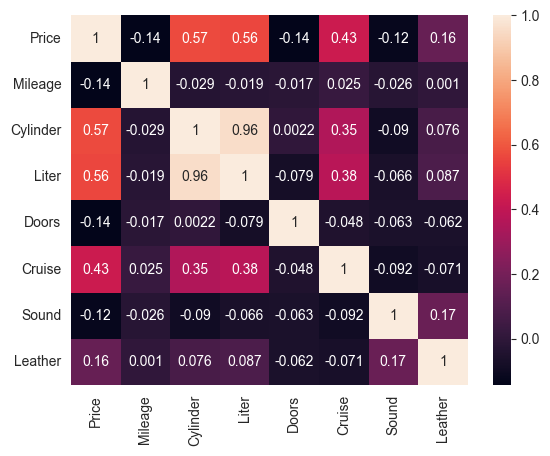

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True) # korelasyon ısı haritası

In [13]:
# outlier formülü
# +-3 * standart sapma
df['Price'].std() # standart sapma

np.float64(9884.852800898008)

In [14]:
df.tail(3)

Price  Mileage    Make     Model           Trim   Type  Cylinder  \
801  15731.132897    20484  Saturn  L Series  L300 Sedan 4D  Sedan         6   
802  15118.893228    25979  Saturn  L Series  L300 Sedan 4D  Sedan         6   
803  13585.636802    35662  Saturn  L Series  L300 Sedan 4D  Sedan         6   

     Liter  Doors  Cruise  Sound  Leather  
801    3.0      4       1      1        0  
802    3.0      4       1      1        0  
803    3.0      4       1      0        0

In [15]:
df.isnull().sum() # eksik veri var mı?

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [16]:
df['Make'].unique() # benzersiz araç markaları

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [17]:
df['Make'].nunique() # benzersiz araç marka sayısı

6

In [18]:
df['Make'].value_counts() # markalara göre araç sayısı

Make
Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: count, dtype: int64

In [19]:
df['Make'].value_counts(normalize=True) # markalara göre araç sayısı yüzdesi

Make
Chevrolet    0.398010
Pontiac      0.186567
SAAB         0.141791
Buick        0.099502
Cadillac     0.099502
Saturn       0.074627
Name: proportion, dtype: float64

<Axes: ylabel='Make'>

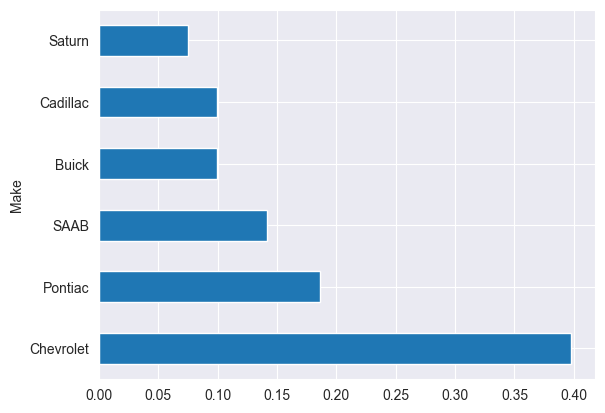

In [20]:
df['Make'].value_counts(normalize=True).plot.barh() # markalara göre araç sayısı

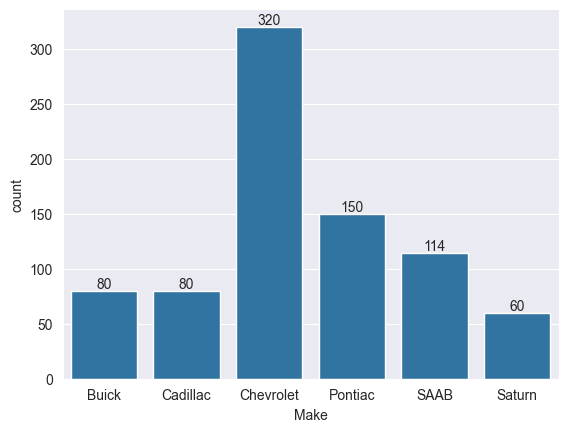

In [21]:
ax = sns.countplot(x=df['Make']); # markalara göre araç sayısı
ax.bar_label(ax.containers[0]);

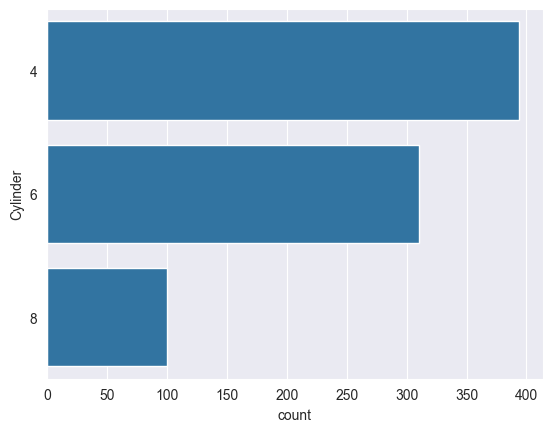

In [22]:
sns.countplot(y=df['Cylinder']); # silindir sayısına göre araç sayısı

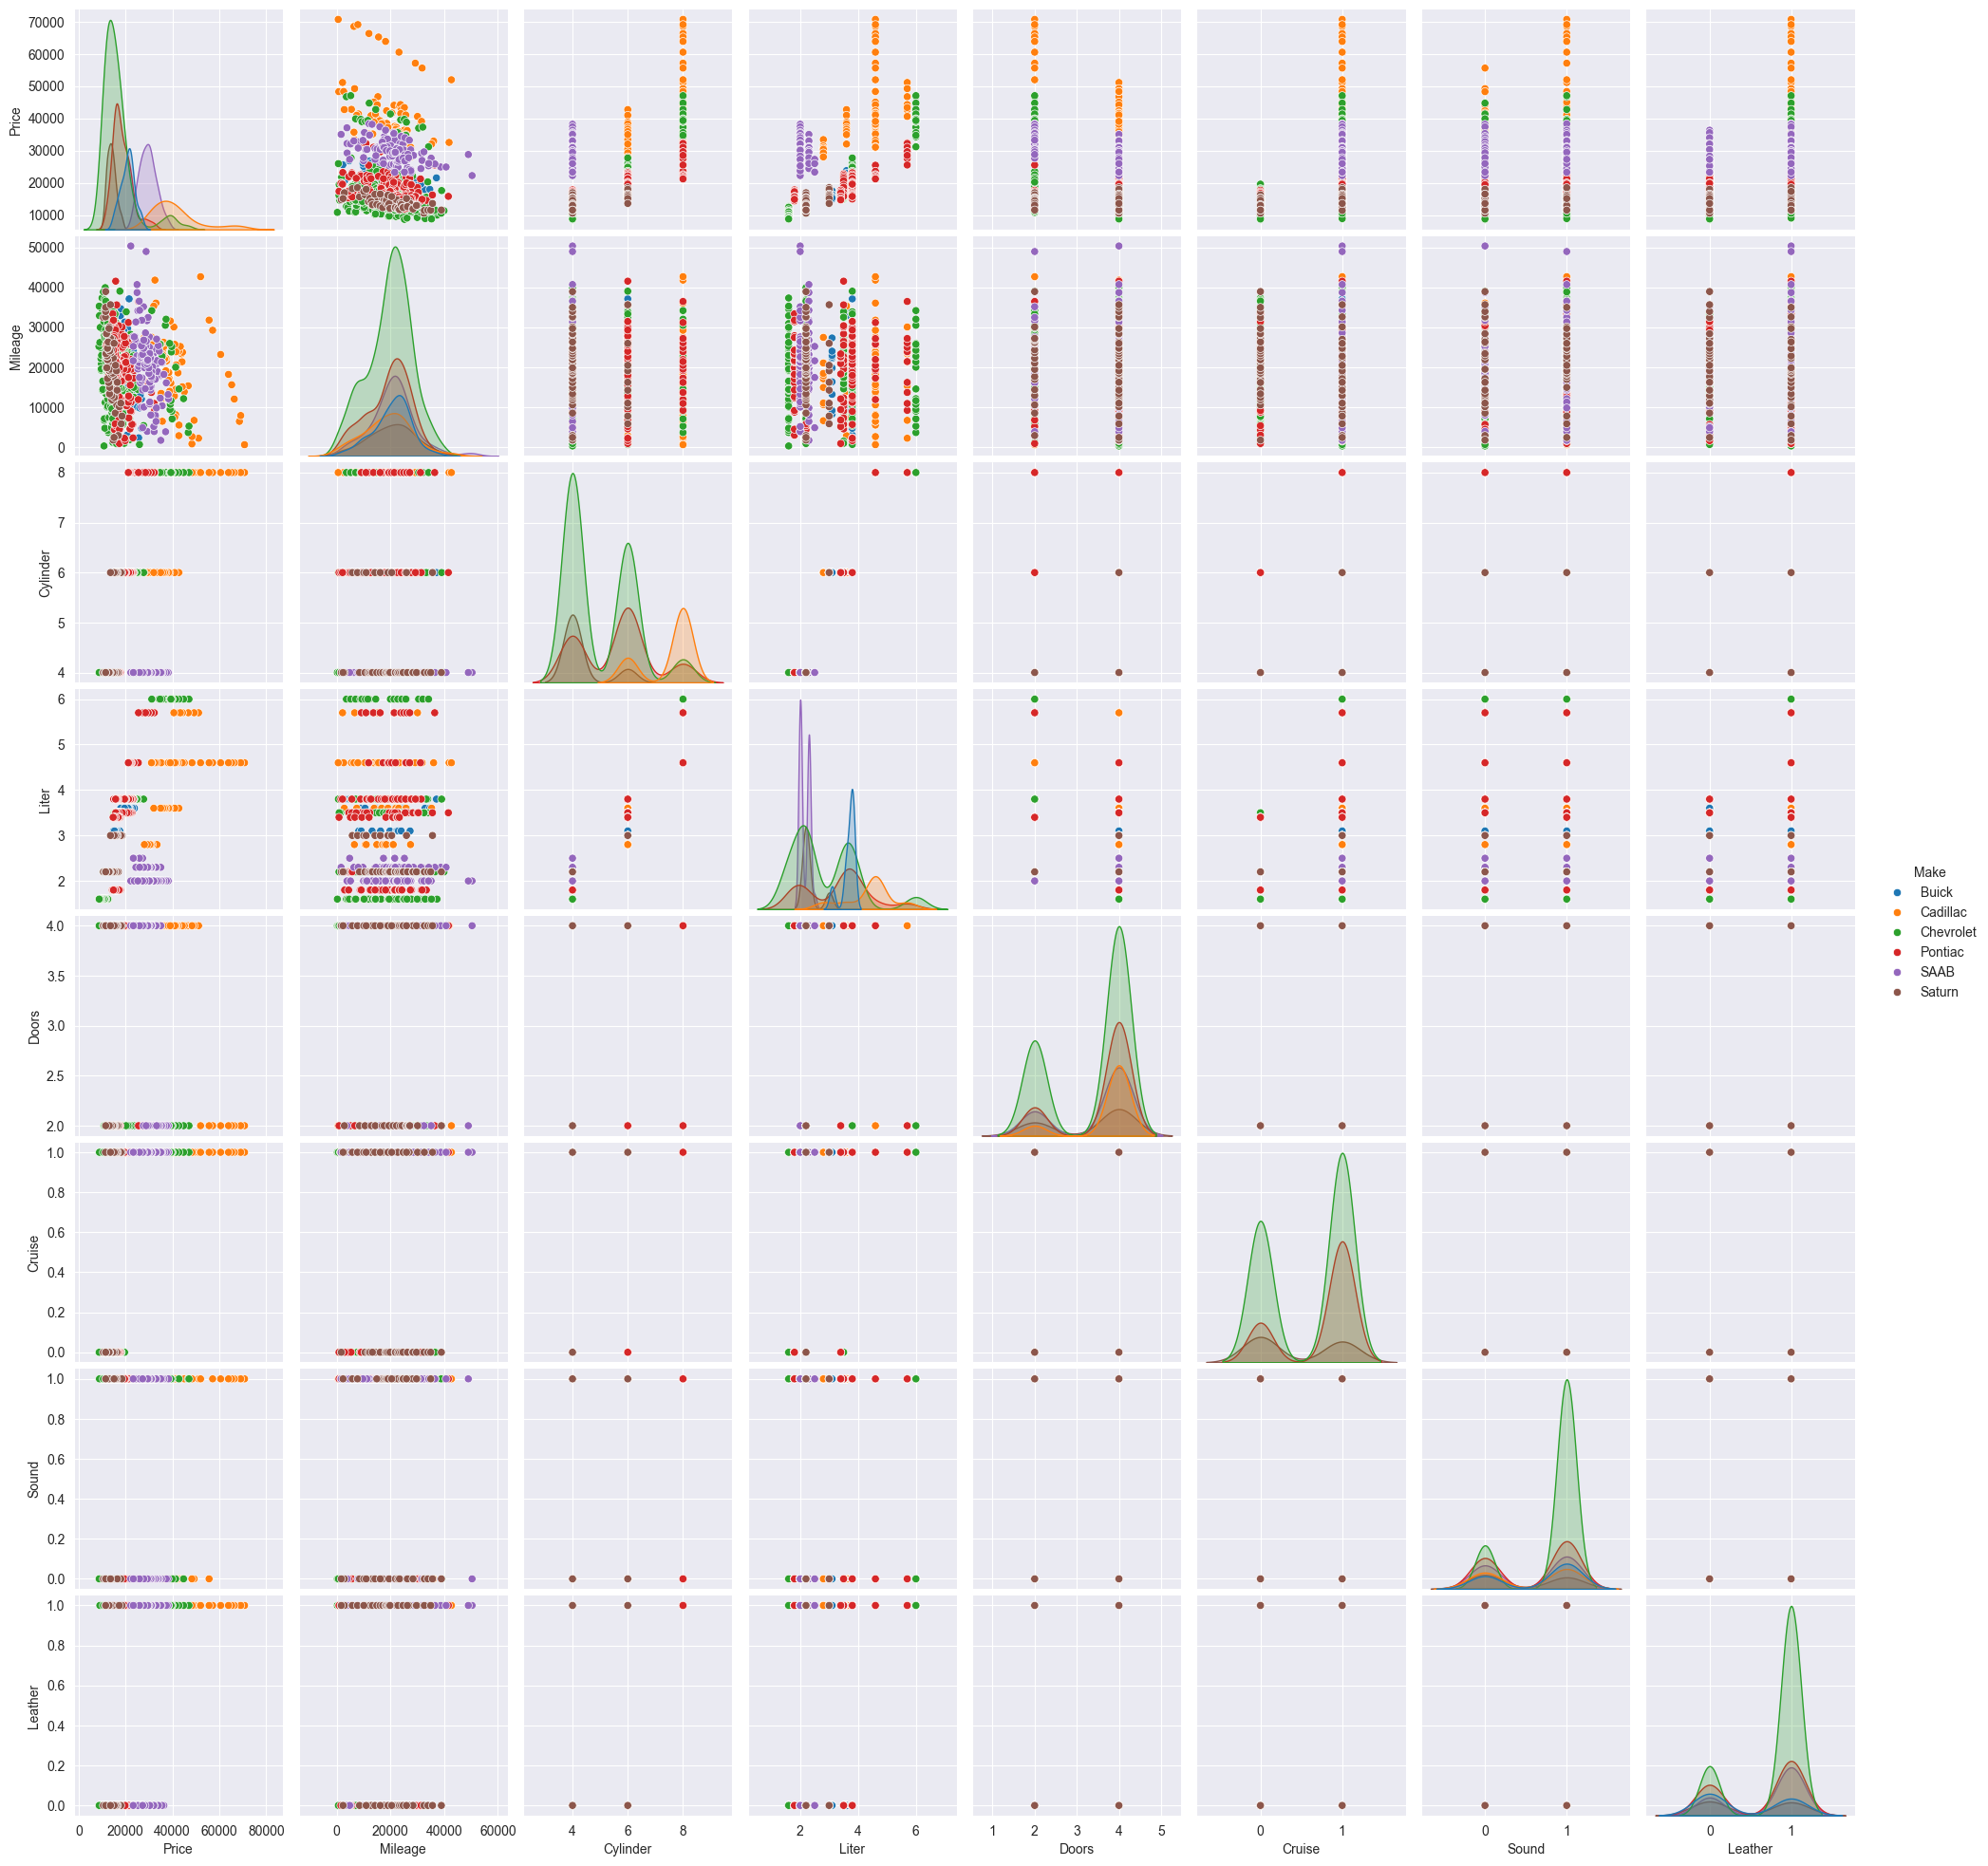

In [23]:
sns.pairplot(df, hue='Make'); # veriler arasındaki ilişki

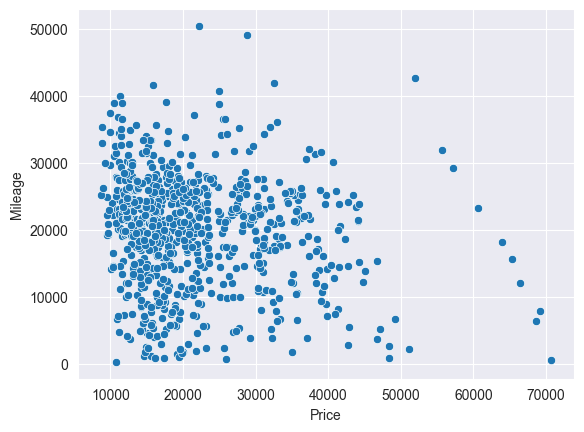

In [24]:
sns.scatterplot(x='Price', y='Mileage', data=df); # fiyat ve kilometre arasındaki ilişki

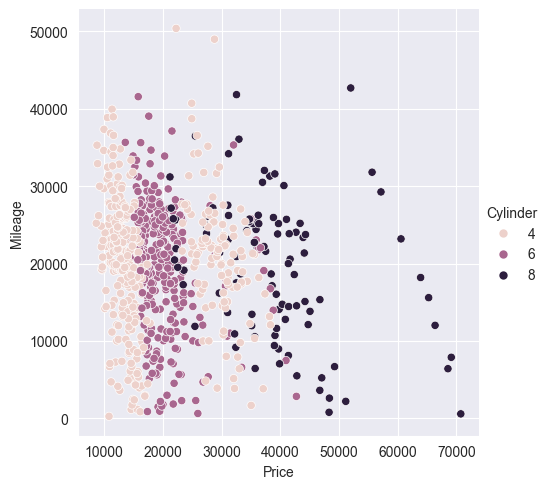

In [25]:
sns.relplot(x='Price', y='Mileage', hue='Cylinder', data=df); # fiyat ve kilometre arasındaki ilişki

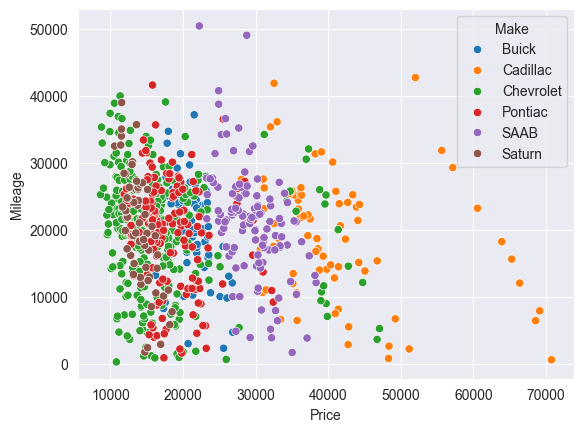

In [26]:
sns.scatterplot(x='Price', y='Mileage', hue='Make', data=df); # fiyat ve kilometre arasındaki ilişki markalara göre

### P Değeri Hesaplama

In [27]:
# Ho = arabanın fiyatı ve km'si arasındaki ilişki yok
# Ha = arabanın fiyatı ve km'si arasında ilişki var
# p -değeri < 0.05 ise Ho reddedilir

In [28]:
from scipy.stats import ttest_ind

In [29]:
t,p=ttest_ind(df['Price'], df['Mileage']) # p-değeri
p

np.float64(0.0008662338227446263)

In [30]:
t # t-değeri (test istatistiği)

np.float64(3.3369955824353217)

In [31]:
# Sonuç olarak p=0.0008662338227446263 < 0.05 olduğu için Ho reddedilir

### Histogram

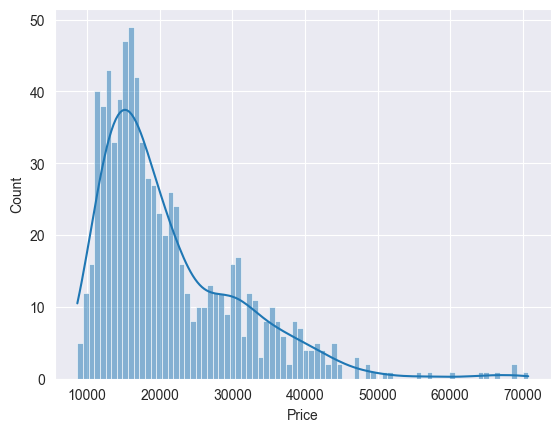

In [32]:
sns.histplot(df['Price'], kde=True, bins=80); # fiyat dağılımı, kde=True ise yoğunluk grafiği, bins=100 ise çubuk sayısı

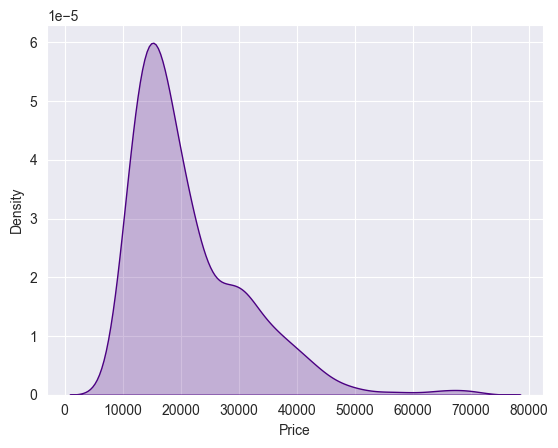

In [33]:
sns.kdeplot(df['Price'], fill=True, color='indigo'); # fiyat dağılımı

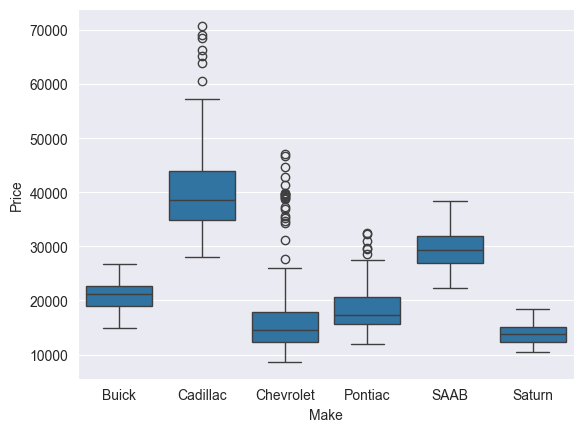

In [34]:
sns.boxplot(x='Make', y='Price', data=df); # markalara göre fiyat dağılımı

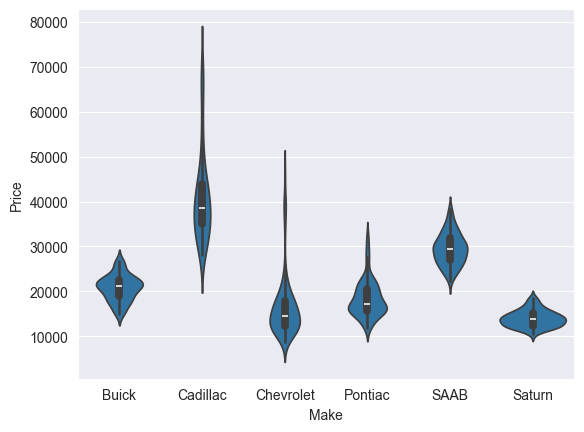

In [35]:
sns.violinplot(x='Make', y='Price', data=df); # markalara göre fiyat dağılımı

In [36]:
import plotly.express as px

In [37]:
px.bar(df['Make'].value_counts(), title='Markalara Göre Araç Sayısı') # markalara göre araç sayısı

In [38]:
px.scatter_3d(df, x='Mileage', y='Price', z='Cylinder', color='Make') # 3D scatter plot

In [39]:
# Webde görselleştirme yapmak için MLOps kullanılabilir

In [40]:
px.sunburst(df, path=['Make', 'Model', 'Trim']) # sunburst

## Feature Engineering

In [41]:
df.corr(numeric_only=True) # korelasyon

Price   Mileage  Cylinder     Liter     Doors    Cruise  \
Price     1.000000 -0.143051  0.569086  0.558146 -0.138750  0.430851   
Mileage  -0.143051  1.000000 -0.029461 -0.018641 -0.016944  0.025037   
Cylinder  0.569086 -0.029461  1.000000  0.957897  0.002206  0.354285   
Liter     0.558146 -0.018641  0.957897  1.000000 -0.079259  0.377509   
Doors    -0.138750 -0.016944  0.002206 -0.079259  1.000000 -0.047674   
Cruise    0.430851  0.025037  0.354285  0.377509 -0.047674  1.000000   
Sound    -0.124348 -0.026146 -0.089704 -0.065527 -0.062530 -0.091730   
Leather   0.157197  0.001005  0.075520  0.087332 -0.061969 -0.070573   

             Sound   Leather  
Price    -0.124348  0.157197  
Mileage  -0.026146  0.001005  
Cylinder -0.089704  0.075520  
Liter    -0.065527  0.087332  
Doors    -0.062530 -0.061969  
Cruise   -0.091730 -0.070573  
Sound     1.000000  0.165444  
Leather   0.165444  1.000000

In [42]:
# abs = absolute value (mutlak değer)
abs(df.corr(numeric_only=True))['Price'].sort_values(ascending=False) # fiyat ile en çok korelasyonu olan sütunlar

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Mileage     0.143051
Doors       0.138750
Sound       0.124348
Name: Price, dtype: float64

In [43]:
x = df[['Mileage', 'Cylinder', 'Liter', 'Cruise']] # features - bağımsız değişkenler
y = df[['Price']] # target - bağımlı değişken

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # veriyi train ve test olarak ayırma, random_state=42 rastgelelik için sabit bir değer verir çünkü her seferinde farklı sonuçlar alınabilir bunun nedeni verinin rastgele seçilmesidir ve bu durum modelin doğruluğunu etkileyebilir bu nedenle random_state=42 verilir

In [46]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((643, 4), (161, 4), (643, 1), (161, 1))

## Modelling

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression() # model

In [49]:
model = lr.fit(x_train, y_train) # makine öğrenmesi modeli

In [50]:
tahmin = model.predict(x_test) # tahmin

In [51]:
from sklearn.metrics import r2_score, mean_squared_error

In [52]:
mean_squared_error(y_test, tahmin) ** .5 # hata kareler ortalamasının karekökü

np.float64(7413.255792158803)

In [53]:
r2_score(y_test, tahmin) # r2_score

0.3071114906997998

## Label Encoding

In [54]:
x = df[['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Make', 'Trim']] # features - bağımsız değişkenler
y = df[['Price']] # target - bağımlı değişken

In [55]:
x.head()

Mileage  Cylinder  Liter  Cruise   Make      Trim
0     8221         6    3.1       1  Buick  Sedan 4D
1     9135         6    3.1       1  Buick  Sedan 4D
2    13196         6    3.1       1  Buick  Sedan 4D
3    16342         6    3.1       1  Buick  Sedan 4D
4    19832         6    3.1       1  Buick  Sedan 4D

#### Sparse Matrix
Veri eğitilirken text verilerde veri üstünlüğünü engellemek için kullanılır

In [56]:
 x = pd.get_dummies(x, drop_first=True) # One Hot Encoding yani kategorik verileri sayısal verilere dönüştürme

In [57]:
x.head()

Mileage  Cylinder  Liter  Cruise  Make_Cadillac  Make_Chevrolet  \
0     8221         6    3.1       1          False           False   
1     9135         6    3.1       1          False           False   
2    13196         6    3.1       1          False           False   
3    16342         6    3.1       1          False           False   
4    19832         6    3.1       1          False           False   

   Make_Pontiac  Make_SAAB  Make_Saturn  Trim_Aero Conv 2D  \
0         False      False        False              False   
1         False      False        False              False   
2         False      False        False              False   
3         False      False        False              False   
4         False      False        False              False   

   Trim_Aero Sedan 4D  Trim_Aero Wagon 4D  Trim_Arc Conv 2D  \
0               False               False             False   
1               False               False             False   
2               False               False             False   
3               False               False             False   
4               False               False             False   

   Trim_Arc Sedan 4D  Trim_Arc Wagon 4D  Trim_CX Sedan 4D  Trim_CXL Sedan 4D  \
0              False              False             False              False   
1              False              False             False              False   
2              False              False             False              False   
3              False              False             False              False   
4              False              False             False              False   

   Trim_CXS Sedan 4D  Trim_Conv 2D  Trim_Coupe 2D  Trim_Custom Sedan 4D  \
0              False         False          False                 False   
1              False         False          False                 False   
2              False         False          False                 False   
3              False         False          False                 False   
4              False         False          False                 False   

   Trim_DHS Sedan 4D  Trim_DTS Sedan 4D  Trim_GT Coupe 2D  Trim_GT Sedan 4D  \
0              False              False             False             False   
1              False              False             False             False   
2              False              False             False             False   
3              False              False             False             False   
4              False              False             False             False   

   Trim_GT Sportwagon  Trim_GTP Sedan 4D  Trim_GXP Sedan 4D  \
0               False              False              False   
1               False              False              False   
2               False              False              False   
3               False              False              False   
4               False              False              False   

   Trim_Hardtop Conv 2D  Trim_L300 Sedan 4D  Trim_LS Coupe 2D  \
0                 False               False             False   
1                 False               False             False   
2                 False               False             False   
3                 False               False             False   
4                 False               False             False   

   Trim_LS Hatchback 4D  Trim_LS MAXX Hback 4D  Trim_LS Sedan 4D  \
0                 False                  False             False   
1                 False                  False             False   
2                 False                  False             False   
3                 False                  False             False   
4                 False                  False             False   

   Trim_LS Sport Coupe 2D  Trim_LS Sport Sedan 4D  Trim_LT Coupe 2D  \
0                   False                   False             False   
1                   False                   False             False   
2                   False      

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # veriyi train ve test olarak ayırma

In [59]:
model = lr.fit(x_train, y_train) # makine öğrenmesi modeli

In [60]:
tahmin = model.predict(x_test) # tahmin

In [61]:
mean_squared_error(y_test, tahmin) ** .5 # Root Mean Squared Error (RMSE) - hata kareler ortalamasının karekökü

np.float64(1523.631472871131)

In [62]:
r2_score(y_test, tahmin) # r2_score

0.9707311770106378

In [63]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [64]:
R = Ridge()
L = Lasso()
E = ElasticNet()

In [65]:
model_R = R.fit(x_train, y_train)

In [66]:
tahmin_R = model_R.predict(x_test)

In [67]:
mean_squared_error(y_test, tahmin_R) ** .5

np.float64(1575.6786242840044)

In [68]:
r2_score(y_test, tahmin_R)

0.9686973810318732

In [69]:
model_L = L.fit(x_train, y_train)

In [70]:
tahmin_L = model_L.predict(x_test)

In [71]:
mean_squared_error(y_test, tahmin_L) ** .5

np.float64(1527.0430928302271)

In [72]:
r2_score(y_test, tahmin_L)

0.9705999564419019

In [73]:
model_E = E.fit(x_train, y_train)

In [74]:
tahmin_E = model_E.predict(x_test)

In [75]:
mean_squared_error(y_test, tahmin_E) ** .5

np.float64(5916.121656152222)

In [76]:
r2_score(y_test, tahmin_E)

0.558714578586518

### Coefficient - Katsayılar

In [77]:
lr.coef_ # katsayılar

array([[-1.98809431e-01, -2.60219053e+03,  7.38331957e+03,
        -1.05024563e+02,  1.55364461e+04, -2.81688090e+03,
        -3.59594608e+03,  6.85100028e+03, -2.29878609e+03,
         3.90588224e+03, -2.64773527e+03, -1.26995361e+03,
         7.05993990e+03, -2.22310734e+02,  1.38127365e+02,
        -8.04390904e+03, -6.79607391e+03, -6.85437716e+03,
         3.54018314e+03, -5.72790226e+03, -1.11979437e+04,
        -8.32030557e+03, -7.59431897e+03, -8.10925499e+03,
        -6.53924263e+03, -3.82628105e+02, -5.76220228e+03,
        -3.63992297e+03,  1.67584142e+04, -5.32327214e+03,
        -7.83067529e+03, -4.64523486e+03, -7.53303979e+03,
        -6.65186020e+03, -7.63546793e+03, -6.87040602e+03,
        -6.33606759e+03, -3.92489639e+03, -7.03882417e+03,
        -6.17480932e+03, -8.14421976e+03,  4.52867027e+03,
        -2.53728086e+03, -2.10433902e+03, -7.88530569e+03,
        -6.07227049e+03, -6.65263910e+03, -5.53516395e+03,
        -4.78023915e+03, -3.13661125e+03, -6.92039280e+0

In [78]:
feature_importance = pd.DataFrame({ 'Feature' : x_train.columns, 'Coefs' : lr.coef_[0] })

In [79]:
feature_importance = feature_importance.sort_values(by='Coefs', ascending=False)

In [80]:
feature_importance

Feature         Coefs
28      Trim_Hardtop Conv 2D  16758.414214
4              Make_Cadillac  15536.446130
2                      Liter   7383.319566
12          Trim_Arc Conv 2D   7059.939896
7                  Make_SAAB   6851.000276
41       Trim_Linear Conv 2D   4528.670272
9          Trim_Aero Conv 2D   3905.882237
18              Trim_Conv 2D   3540.183141
14         Trim_Arc Wagon 4D    138.127365
0                    Mileage     -0.198809
3                     Cruise   -105.024563
13         Trim_Arc Sedan 4D   -222.310734
25        Trim_GT Sportwagon   -382.628105
11        Trim_Aero Wagon 4D  -1269.953605
54        Trim_Sportwagon 4D  -1453.737428
43      Trim_Linear Wagon 4D  -2104.339024
8                Make_Saturn  -2298.786085
42      Trim_Linear Sedan 4D  -2537.280862
1                   Cylinder  -2602.190533
10        Trim_Aero Sedan 4D  -2647.735267
5             Make_Chevrolet  -2816.880903
49          Trim_SS Sedan 4D  -3136.611254
6               Make_Pontiac  -3595.946075
27         Trim_GXP Sedan 4D  -3639.922969
37      Trim_LT Hatchback 4D  -3924.896395
31      Trim_LS Hatchback 4D  -4645.234857
48          Trim_SS Coupe 2D  -4780.239150
53  Trim_Special Ed Ultra 4D  -4875.643850
29        Trim_L300 Sedan 4D  -5323.272136
51         Trim_SVM Sedan 4D  -5515.189525
47         Trim_SLE Sedan 4D  -5535.163950
19             Trim_Coupe 2D  -5727.902260
26         Trim_GTP Sedan 4D  -5762.202280
45        Trim_Quad Coupe 2D  -6072.270492
39          Trim_LT Sedan 4D  -6174.809319
36          Trim_LT Coupe 2D  -6336.067587
24          Trim_GT Sedan 4D  -6539.242633
33          Trim_LS Sedan 4D  -6651.860202
46          Trim_SE Sedan 4D  -6652.639100
16         Trim_CXL Sedan 4D  -6796.073911
17         Trim_CXS Sedan 4D  -6854.377165
35    Trim_LS Sport Sedan 4D  -6870.406019
50     Trim_SVM Hatchback 4D  -6920.392799
38     Trim_LT MAXX Hback 4D  -7038.824171
32     Trim_LS MAXX Hback 4D  -7533.039792
22         Trim_DTS Sedan 4D  -7594.318973
34    Trim_LS Sport Coupe 2D  -7635.467926
52             Trim_Sedan 4D  -7770.244748
30          Trim_LS Coupe 2D  -7830.675291
44        Trim_MAXX Hback 4D  -7885.305685
15          Trim_CX Sedan 4D  -8043.909039
23          Trim_GT Coupe 2D  -8109.254993
40     Trim_Limited Sedan 4D  -8144.219762
21         Trim_DHS Sedan 4D  -8320.305567
20      Trim_Custom Sedan 4D -11197.943729

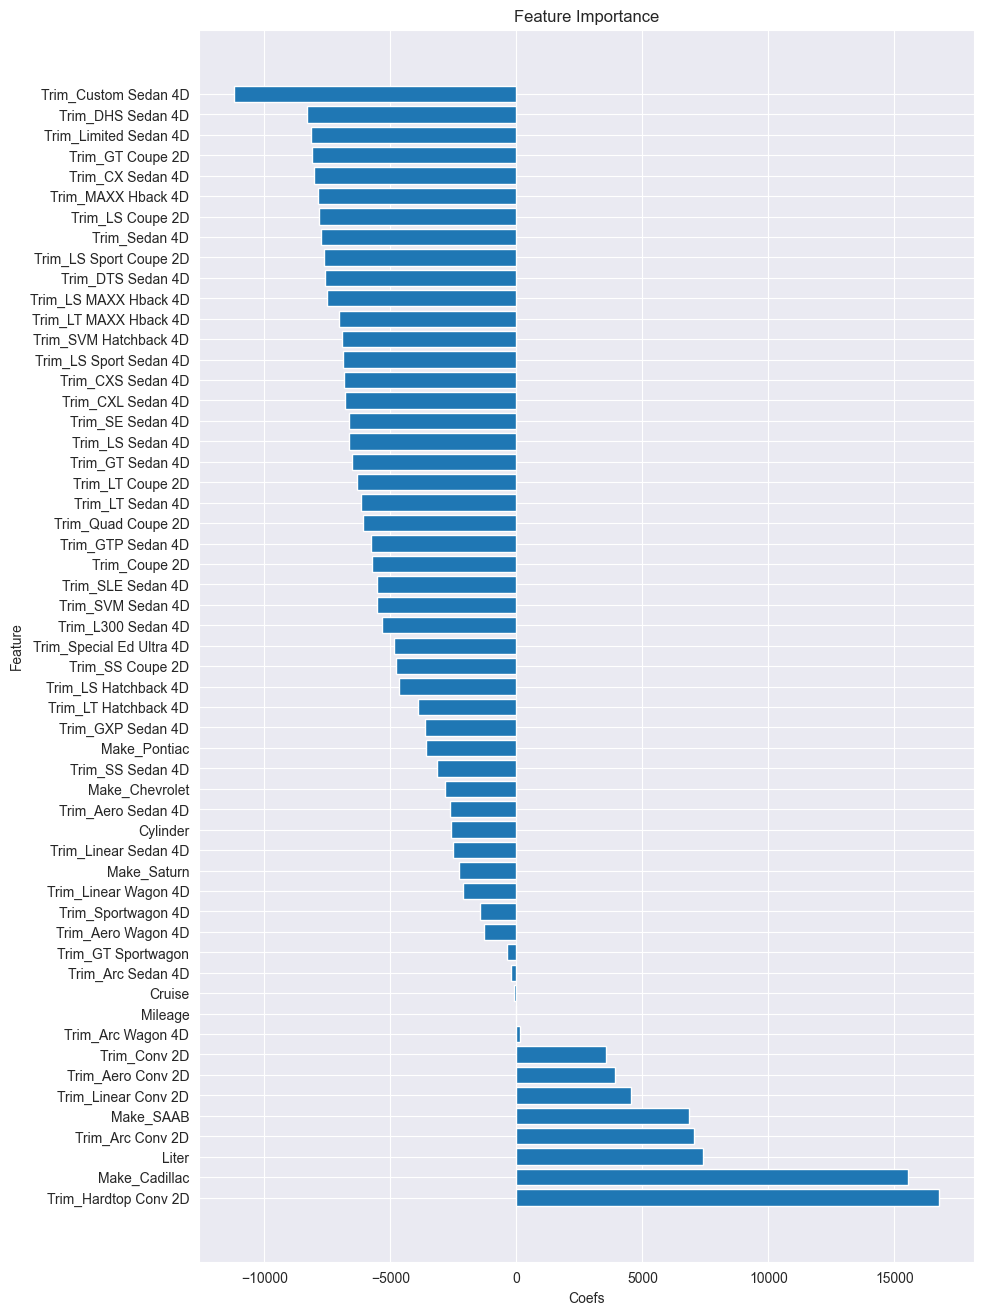

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 16))
plt.barh(feature_importance['Feature'], feature_importance['Coefs'])
plt.xlabel('Coefs')
plt.ylabel('Feature')
plt.title('Feature Importance');

# Regression da basari orani icin bilinmesi gerekenler
1- R2_score > 0.85

2- Dusuk RMSE

3- Residuals should follow normal distribution

In [82]:
residuals = y_test - tahmin

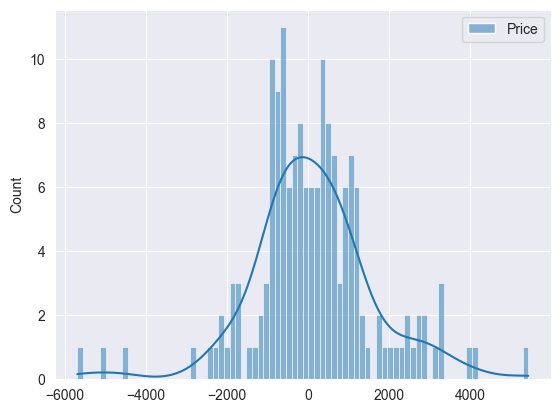

In [83]:
sns.histplot(residuals, kde=True, bins=80);

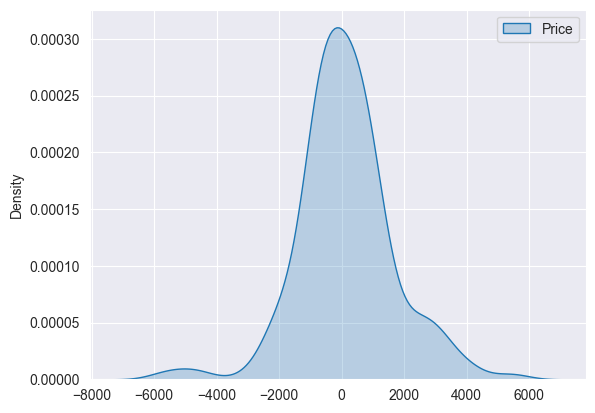

In [84]:
sns.kdeplot(residuals, fill=True);

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
dt = DecisionTreeRegressor()

In [87]:
Dmodel = dt.fit(x_train, y_train) # makine öğrenmesi modeli

In [88]:
Dtahmin = Dmodel.predict(x_test) # tahmin

In [89]:
mean_squared_error(y_test, Dtahmin) ** .5 # Root Mean Squared Error (RMSE) - hata kareler ortalamasının karekökü

np.float64(1766.2816259619249)

In [90]:
r2_score(y_test, Dtahmin) # r2_score

0.9606662556938914

In [91]:
from sklearn.ensemble import ExtraTreesRegressor

In [92]:
et = ExtraTreesRegressor()

In [93]:
ETmodel = et.fit(x_train, y_train) # makine öğrenmesi modeli

/Users/egekibar/Github/ai-course/.venv/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [94]:
ETtahmin = ETmodel.predict(x_test) # tahmin

In [95]:
mean_squared_error(y_test, ETtahmin) ** .5 # Root Mean Squared Error (RMSE) - hata kareler ortalamasının karekökü

np.float64(919.4182694929414)

In [96]:
r2_score(y_test, ETtahmin) # r2_score

0.9893420998672592